### Introduction
Lung Cancer starts from the lungs. When a person has lung cancer, they have abnormal cell that cluster together to form a tumor. Unlike normal cells, cancer cells grow without order or control, destroy the healthy lung tissues around them. The dataset can be downloaded from [kaggle.](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer)

Total no. of attributes:16
No .of instances:308
Attribute information:

1. Gender: M(male), F(female)
2. Age: Age of the patient
3. Smoking: YES=2 , NO=1.
4. Yellow fingers: YES=2 , NO=1.
5. Anxiety: YES=2 , NO=1.
6. Peer_pressure: YES=2 , NO=1.
7. Chronic Disease: YES=2 , NO=1.
8. Fatigue: YES=2 , NO=1.
9. Allergy: YES=2 , NO=1.
10. Wheezing: YES=2 , NO=1.
11. Alcohol: YES=2 , NO=1.
12. Coughing: YES=2 , NO=1.
13. Shortness of Breath: YES=2 , NO=1.
14. Swallowing Difficulty: YES=2 , NO=1.
15. Chest pain: YES=2 , NO=1.
16. Lung Cancer: YES , NO.

WHY:: To know which features contributed most to prediction of machine learning algorithms. In futre, we can improve the accuracy based the these feature importance.

#### Import libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, median_absolute_error, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

#### Load dataset

In [16]:
data = pd.read_csv('lung_cancer_data.csv')

In [17]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [18]:
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [19]:
data.shape

(309, 16)

In [20]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [21]:
# duplicate check
data.duplicated().sum()

33

In [10]:
data = data.drop_duplicates()

In [22]:
# Null check
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [30]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

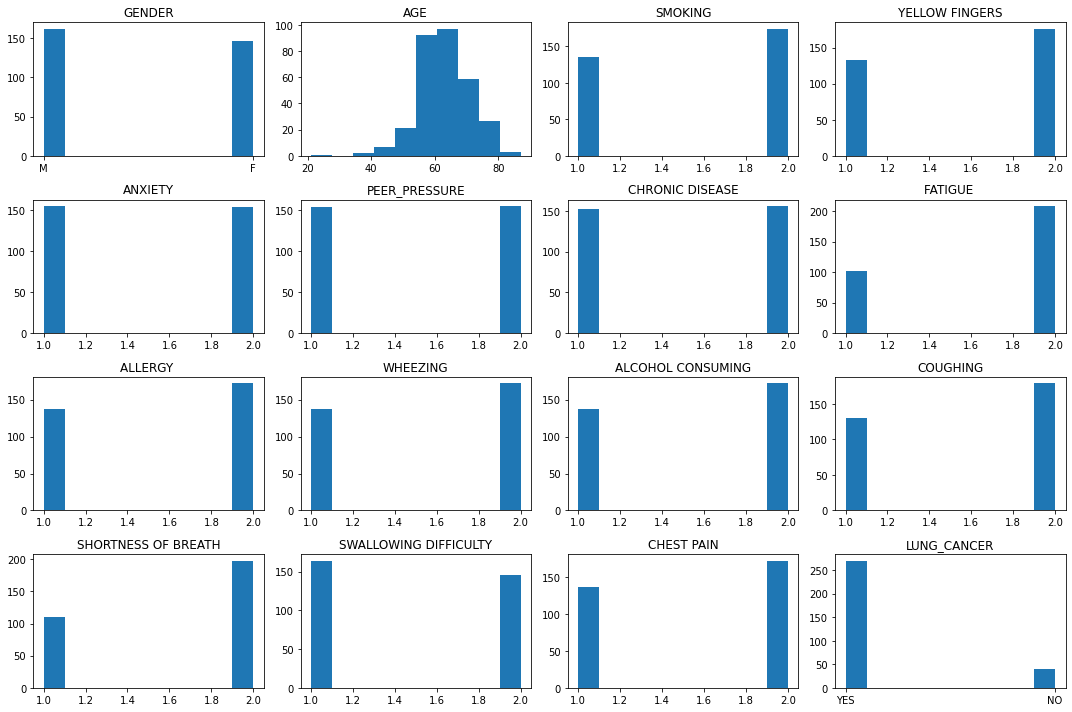

In [39]:
#Histogram Visualization
fig, axs = plt.subplots(4, 4, figsize=(15, 10))
axs[0,0].hist(data['GENDER'])
axs[0,0].set_title('GENDER')

axs[0,1].hist(data['AGE'])
axs[0,1].set_title('AGE')

axs[0,2].hist(data['SMOKING'])
axs[0,2].set_title('SMOKING')

axs[0,3].hist(data['YELLOW_FINGERS'])
axs[0,3].set_title('YELLOW FINGERS')

axs[1,0].hist(data['ANXIETY'])
axs[1,0].set_title('ANXIETY')

axs[1,1].hist(data['PEER_PRESSURE'])
axs[1,1].set_title('PEER_PRESSURE')

axs[1,2].hist(data['CHRONIC DISEASE'])
axs[1,2].set_title('CHRONIC DISEASE')

axs[1,3].hist(data['FATIGUE '])
axs[1,3].set_title('FATIGUE ')

axs[2,0].hist(data['ALLERGY '])
axs[2,0].set_title('ALLERGY ')

axs[2,1].hist(data['WHEEZING'])
axs[2,1].set_title('WHEEZING')

axs[2,2].hist(data['ALCOHOL CONSUMING'])
axs[2,2].set_title('ALCOHOL CONSUMING')

axs[2,3].hist(data['COUGHING'])
axs[2,3].set_title('COUGHING')

axs[3,0].hist(data['SHORTNESS OF BREATH'])
axs[3,0].set_title('SHORTNESS OF BREATH')

axs[3,1].hist(data['SWALLOWING DIFFICULTY'])
axs[3,1].set_title('SWALLOWING DIFFICULTY')

axs[3,2].hist(data['CHEST PAIN'])
axs[3,2].set_title('CHEST PAIN')

axs[3,3].hist(data['LUNG_CANCER'])
axs[3,3].set_title('LUNG_CANCER')

plt.tight_layout()
plt.show()

In [40]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


#### Preprocess some features
The features 'GENDER' and 'LUNG_CANCER' are categorical features. Since there features are binary, we can use LabelEncoder to transform these binary classes into 0 and 1.

In [42]:
label_encoder = preprocessing.LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])

In [45]:
# Check the unique values in features
data.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [50]:
# Lets check distribution of binary features
data_new = data[['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']]

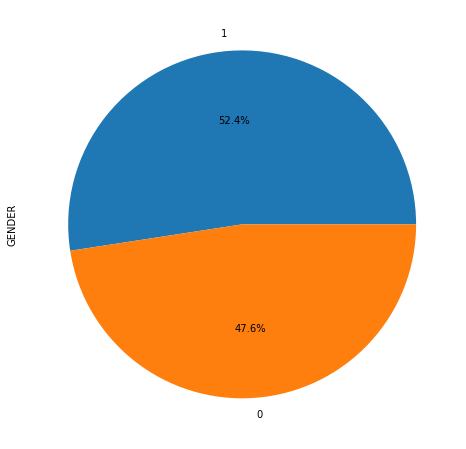

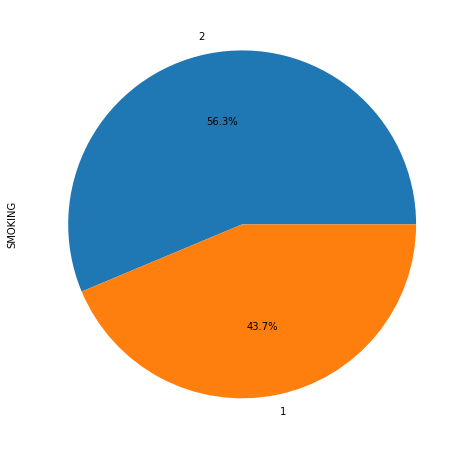

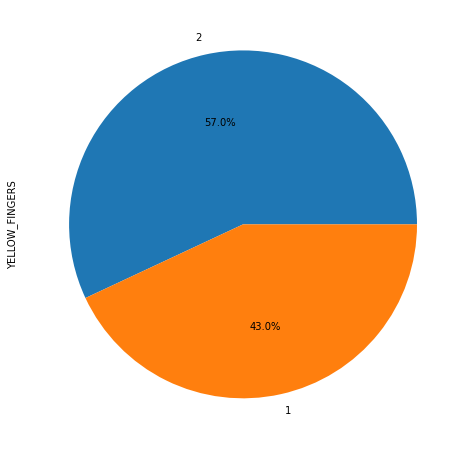

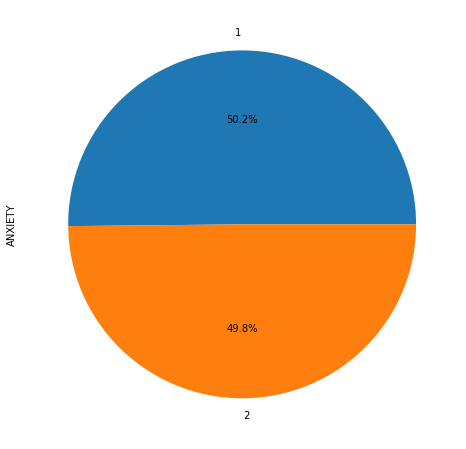

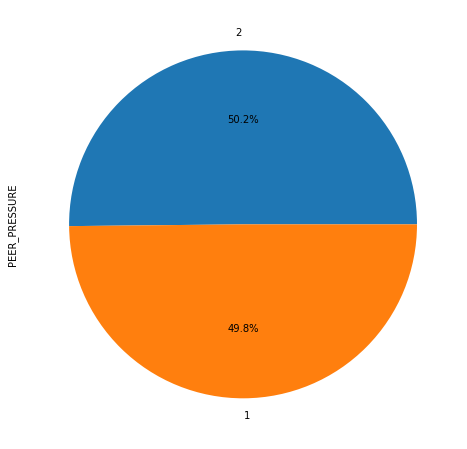

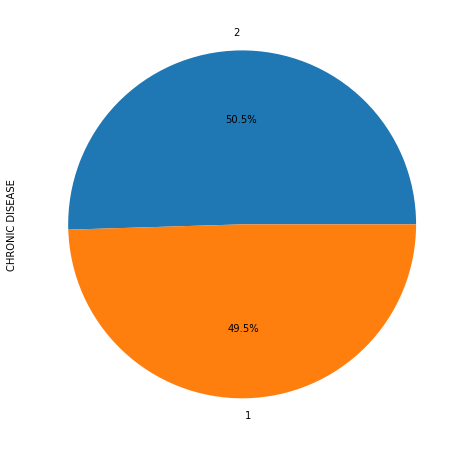

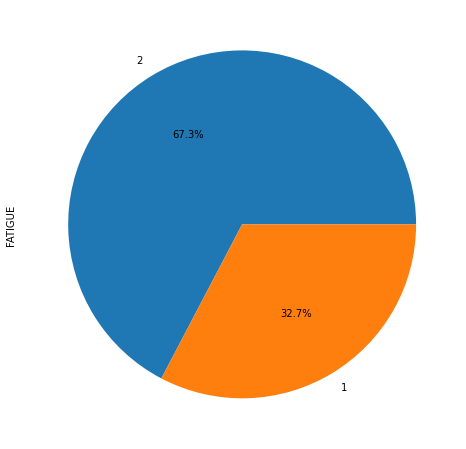

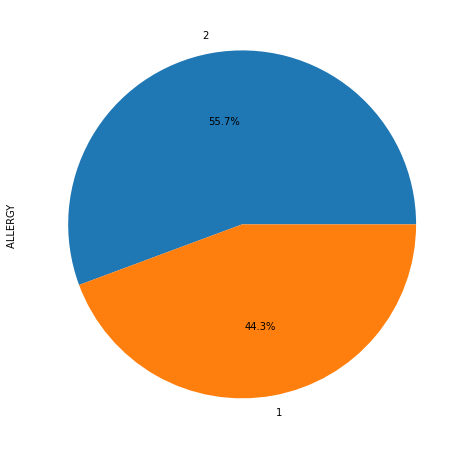

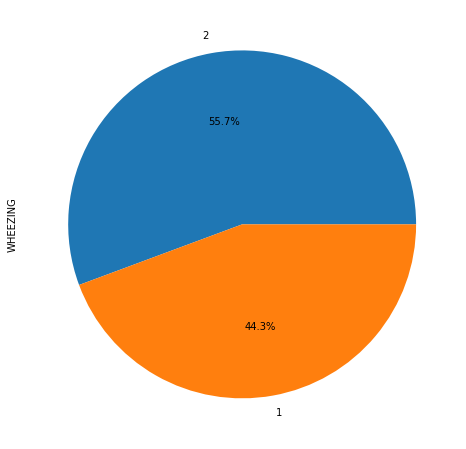

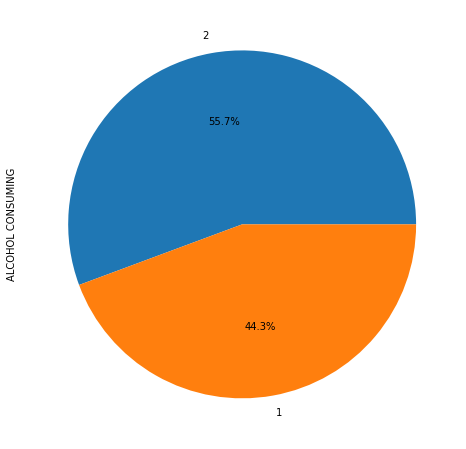

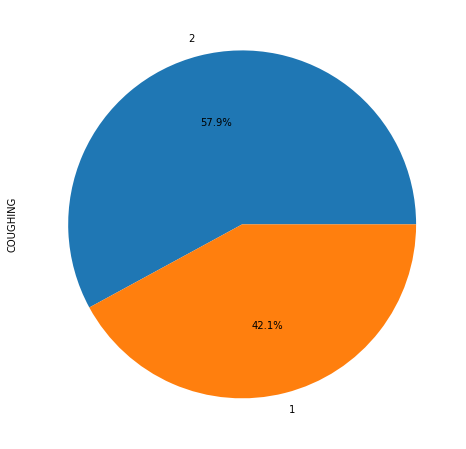

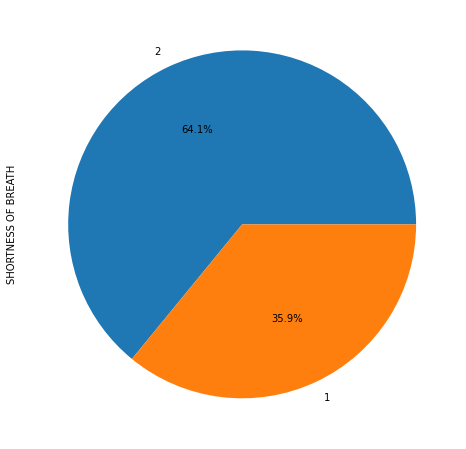

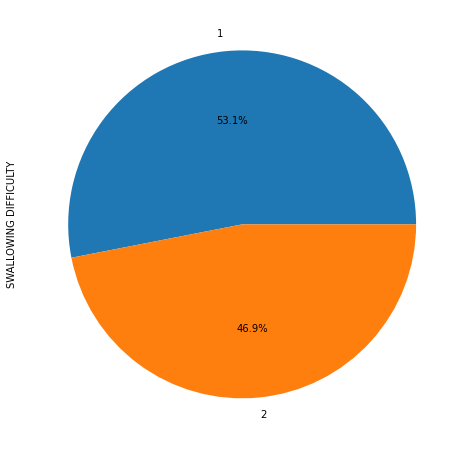

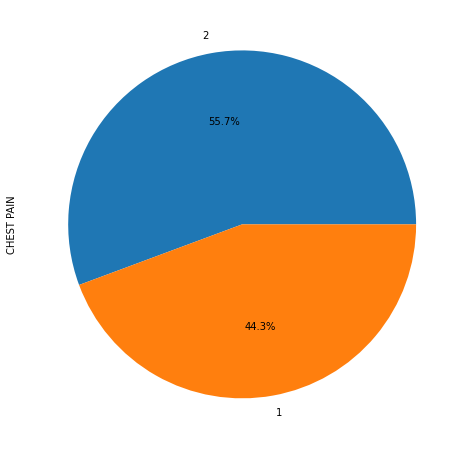

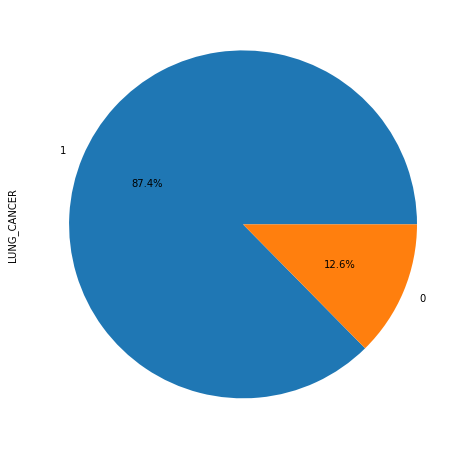

In [49]:
for i in data_new.columns:
    data_new[i].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')
    plt.xticks(rotation =90)
    plt.show()

In [51]:
data_new['LUNG_CANCER'].unique()

array([1, 0])

In [52]:
# How many percent of people have lung cancer
100. * data_new.LUNG_CANCER.value_counts() / len(data_new.LUNG_CANCER)


1    87.378641
0    12.621359
Name: LUNG_CANCER, dtype: float64

#### Age Analysis

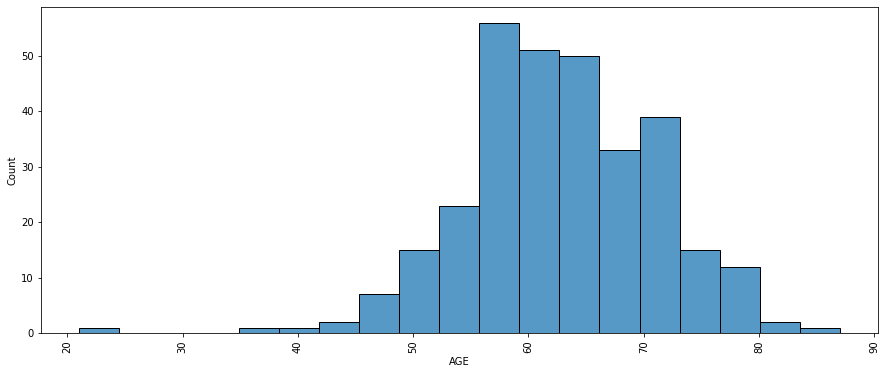

In [54]:
# Age distribution
plt.figure(figsize=(15,6))
sns.histplot(data['AGE'])
plt.xticks(rotation = 90)
plt.show()

People surfer lung cancer age between 55 and 60 years most.

### Gender Analysis

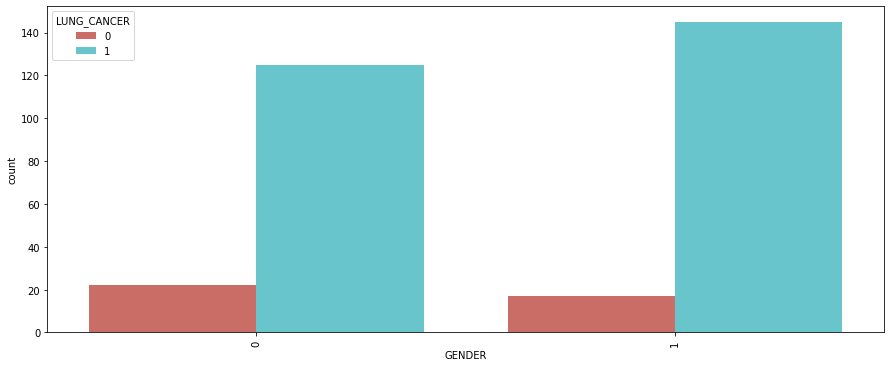

In [55]:
plt.figure(figsize=(15,6))
sns.countplot('GENDER',data=data_new, hue = 'LUNG_CANCER', palette='hls')
plt.xticks(rotation =90)
plt.show()

It seems that male and female are specific when it comes to lung cancer.

### Coughing

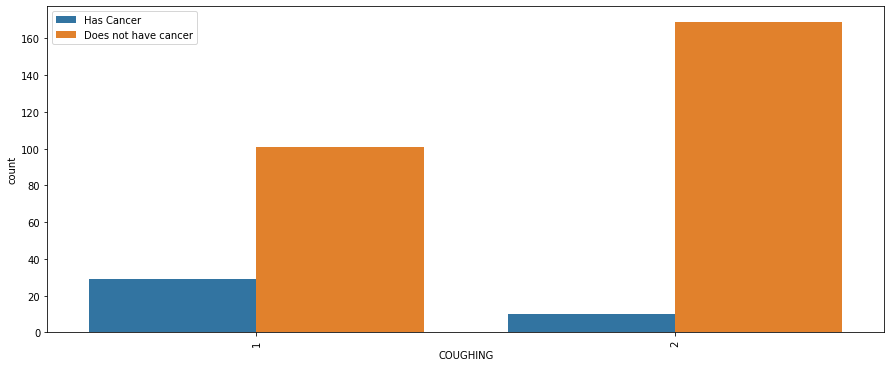

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(data=data_new,x='COUGHING',hue='LUNG_CANCER')
plt.legend(["Has Cancer", "Does not have cancer"])
plt.xticks(rotation = 90)
plt.show()

According above figure, coughing has higher chance to be lunh cancer.

### Yellow Fingers

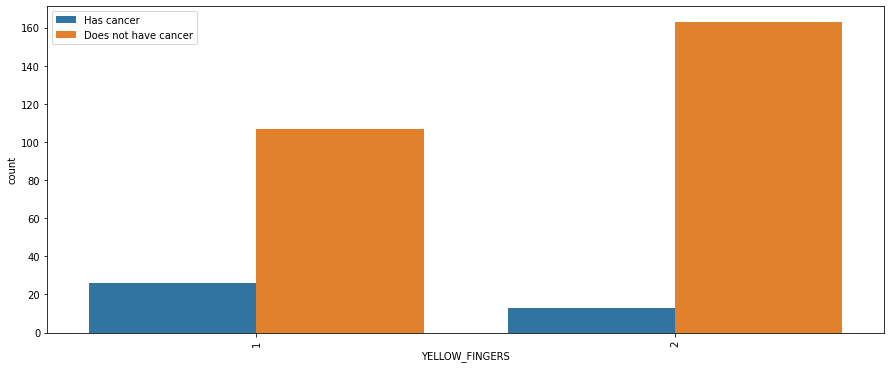

In [59]:
plt.figure(figsize=(15,6))
sns.countplot(data = data_new , x = "YELLOW_FINGERS", hue = "LUNG_CANCER")
plt.legend(["Has cancer", "Does not have cancer"])
plt.xticks(rotation = 90)
plt.show()

Yello fingers is most likely the casue of lung cancer.

### Shortness of breath

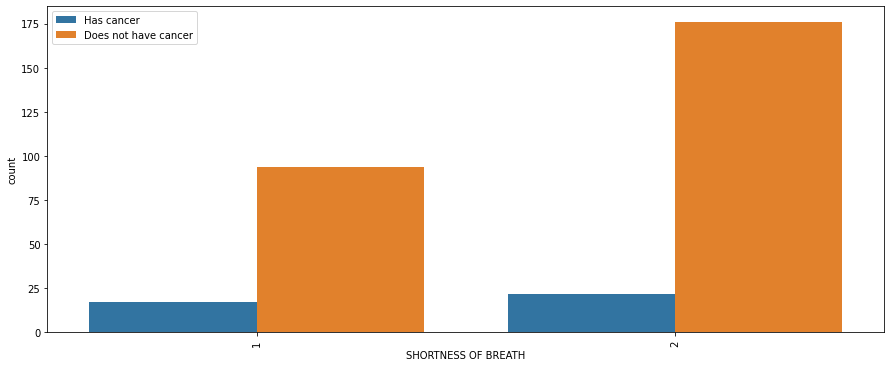

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(data=data_new,x='SHORTNESS OF BREATH',hue ='LUNG_CANCER')
plt.legend(['Has cancer', 'Does not have cancer'])
plt.xticks(rotation = 90)
plt.show()

The shortness of breath is also the casue of lung cancer.

### Anxiety

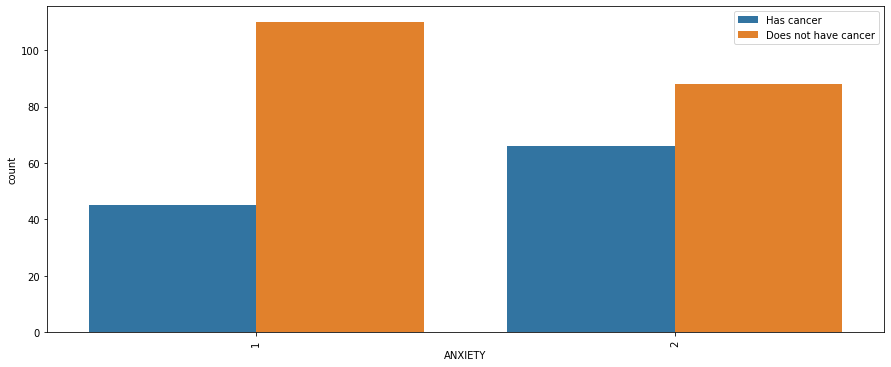

In [61]:
plt.figure(figsize=(15,6))
sns.countplot(data= data_new,x='ANXIETY',hue='SHORTNESS OF BREATH')
plt.legend(["Has cancer", "Does not have cancer"])
plt.xticks(rotation =90)
plt.show()

The anxiety seems that not so much contributio to lung cancer.

### Correlation analysis

In [62]:
corrmat = data_new.corr()
corrmat

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
SMOKING,0.036277,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300
ALCOHOL CONSUMING,0.454268,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226,0.288533


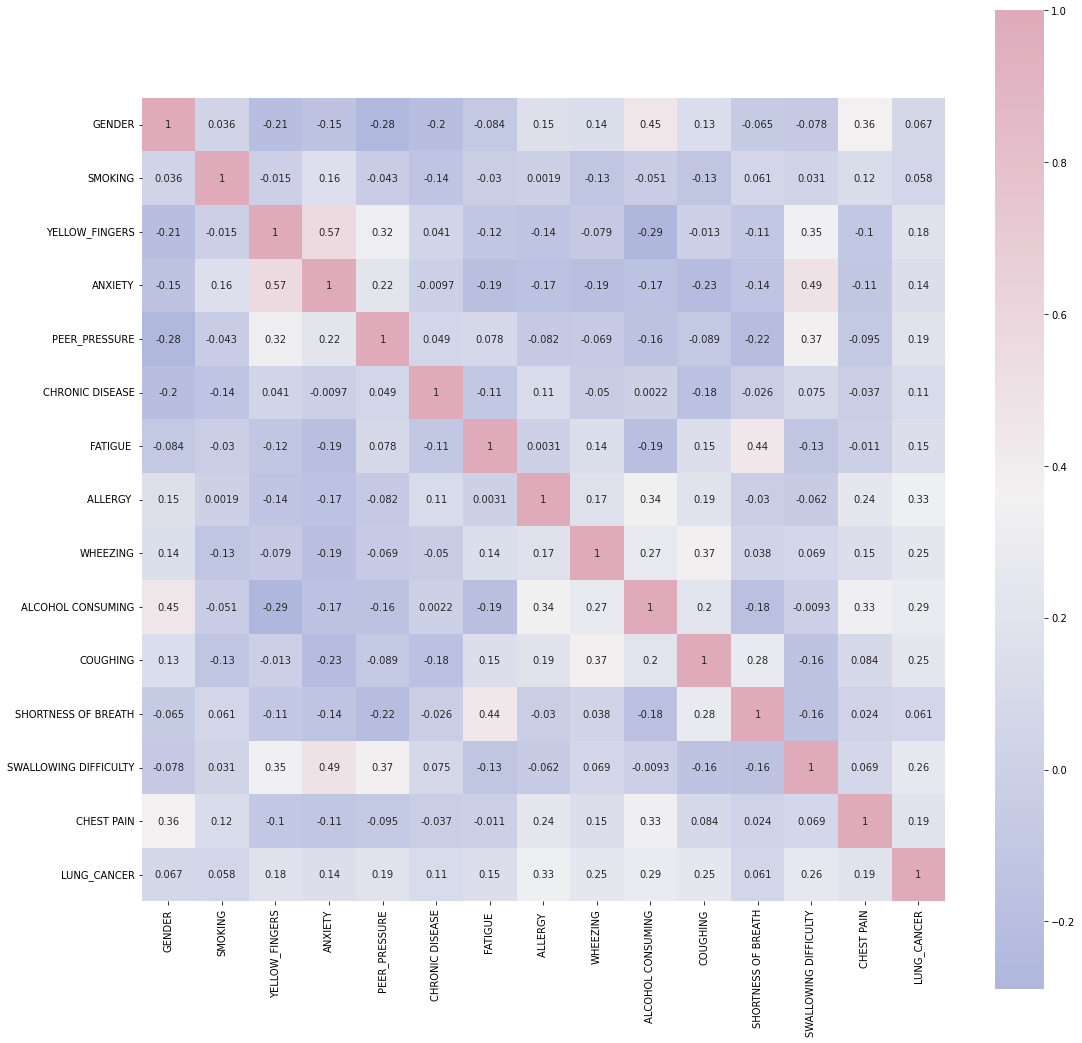

In [63]:
cmap = sns.diverging_palette(260, -10, s=50, l=75, n = 6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap=cmap,annot=True, square=True)
plt.show()

### Modeling

In [64]:
x = data_new.drop("LUNG_CANCER", axis=1)
y = data_new['LUNG_CANCER']

In [67]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [70]:
classifier = LogisticRegression()

In [71]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [72]:
y_pred = classifier.predict(x_test)

In [77]:
from sklearn.metrics import f1_score, median_absolute_error


print("Mean absolute error is ", ( mean_absolute_error(y_test, y_pred)))
print("Mean squared error is ", mean_squared_error(y_test,y_pred))
print("Median absolute error is ", median_absolute_error(y_test,y_pred))
print("Accuracy is ", round(accuracy_score(y_test, y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(y_test, y_pred, average='weighted')*100,2),"%")

Mean absolute error is  0.0641025641025641
Mean squared error is  0.0641025641025641
Median absolute error is  0.0
Accuracy is  93.59 %
F1 score:  93.09 %


### Confusion Matrix

In [84]:
matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
print('Confusion matrix : \n',matrix)

tp, fn, fp, tn = confusion_matrix(y_test, y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(y_test, y_pred, labels=[1,0])
print("Classification report : \n", matrix)

Confusion matrix : 
 [[67  1]
 [ 4  6]]
Outcome values : 
 67 1 4 6
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.99      0.96        68
           0       0.86      0.60      0.71        10

    accuracy                           0.94        78
   macro avg       0.90      0.79      0.83        78
weighted avg       0.93      0.94      0.93        78



### Conclusion

Shortness of breath and smoking contributed most for lung cancer prediction.